Mounted at /content/drive
File found!


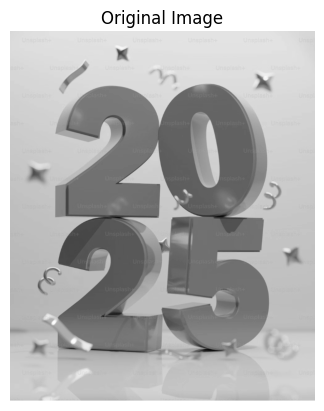

Image size: 889x733


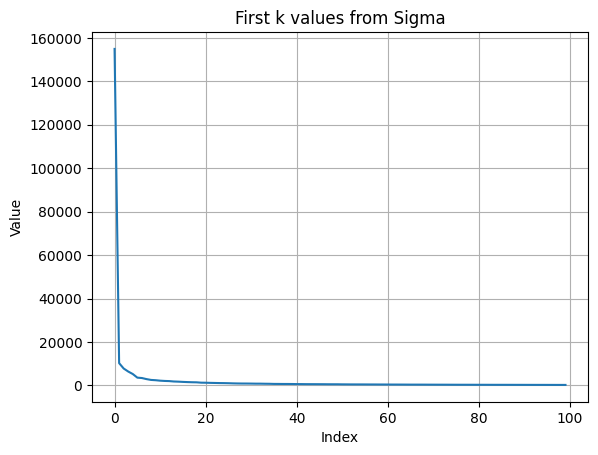

Reconstruction error: 3.7394235490858474


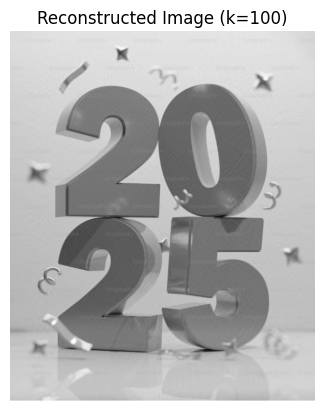

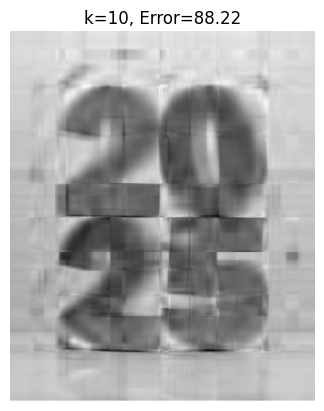

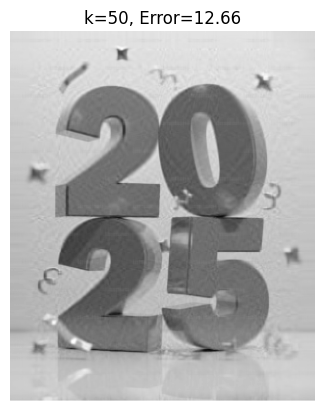

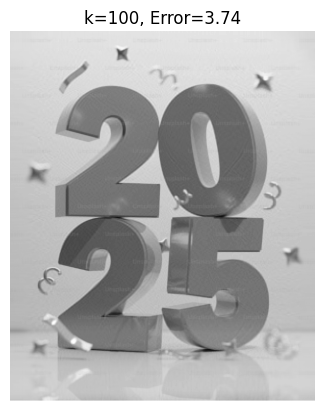

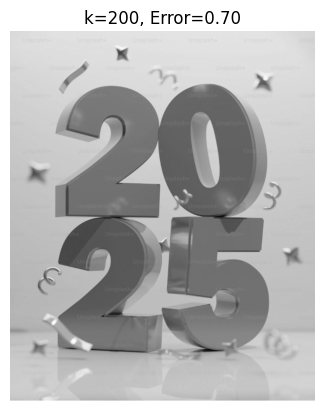

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.decomposition import TruncatedSVD
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = '/content/drive/My Drive/Colab Notebooks/2025.png'

# Check if the file exists
if os.path.exists(image_path):
    print("File found!")
else:
    raise FileNotFoundError("File not found. Please check the path.")

# Load the image
image = imread(image_path)

# Convert to grayscale if the image is in RGB
if len(image.shape) == 3:
    image_gray = np.mean(image, axis=2).astype(np.uint8)
else:
    image_gray = image

plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

# Determine the size of the image
height, width = image_gray.shape
print(f"Image size: {height}x{width}")

# Apply SVD
flat_image = image_gray.reshape(-1, width)
U, S, Vt = np.linalg.svd(flat_image, full_matrices=False)

# Visualize Sigma values
k = 100
plt.plot(np.arange(k), S[:k])
plt.title('First k values from Sigma')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid()
plt.show()

# Compress the image using TruncatedSVD
svd = TruncatedSVD(n_components=k)
truncated_image = svd.fit_transform(flat_image)
reconstructed_flat_image = svd.inverse_transform(truncated_image)

# Reconstruction error
reconstruction_error = np.mean(np.square(reconstructed_flat_image - flat_image))
print(f"Reconstruction error: {reconstruction_error}")

# Visualize the reconstructed image
reconstructed_image = reconstructed_flat_image.reshape(height, width)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.title(f'Reconstructed Image (k={k})')
plt.show()

# Experiments with different k values
for k in [10, 50, 100, 200]:
    svd = TruncatedSVD(n_components=k)
    truncated_image = svd.fit_transform(flat_image)
    reconstructed_flat_image = svd.inverse_transform(truncated_image)
    reconstructed_image = reconstructed_flat_image.reshape(height, width)
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')
    plt.title(f'k={k}, Error={np.mean(np.square(reconstructed_flat_image - flat_image)):.2f}')
    plt.show()